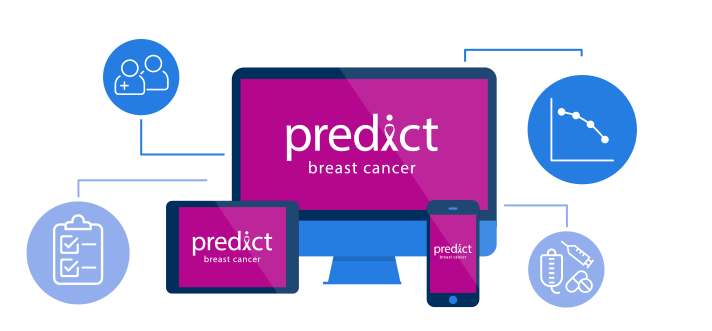

# **Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load data 
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

In [ ]:
#counting no. of rows and column in dataset
df.shape


In [ ]:
#count no. of empty (NaN,na)values in each column
df.isna().sum()

In [ ]:
#Droping colomn with all missing value 
df=df.dropna(axis=1)

In [ ]:
df.describe()

In [ ]:
#Showing updated dataset
df.shape

In [ ]:
#Get count of the number of Malignant(M) or Benign(B) cells
df["diagnosis"].value_counts()

In [ ]:
#visualize the count 
sns.countplot(df["diagnosis"],label='count')

In [ ]:
#Look at the data type to see which columns are encoded 
df.dtypes

In [ ]:
#encoding categorical data value
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values) #get all rows of column 1

df.iloc[:,1]

M =1 and B=0

In [ ]:
#let Create a pair plot of some columns 

sns.pairplot(df.iloc[:,1:7],hue='diagnosis',height = 4)




In [ ]:
#Correlation Table of the dataframe
df.iloc[:,1:].corr()

In [ ]:
#Correaltion matrix of diagnosis with other features
corr_matrix=df.corr()   
corr_matrix['diagnosis'].sort_values(ascending=False)

In [ ]:
#Visualizing corrrealtion 
plt.subplots(figsize=(30,25))

sns.heatmap(df.iloc[:,1:].corr(),annot=True,fmt=".0%")  #fmt gives us percentage 

In [ ]:
#Split the dataset into X and Y 
X=df.drop(["diagnosis"],axis=1)
Y=df["diagnosis"]

In [ ]:
#split data set into 75% training and 25% test dataset
from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
test_id=X_test["id"] #for storing patient id 
X_train=X_train.drop(["id"],axis=1)
X_test=X_test.drop(["id"],axis=1)

In [ ]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train,Y_train)


#Decison tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
tree.fit(X_train,Y_train)
    
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
forest.fit(X_train,Y_train)


#SVM
from sklearn.svm import SVC 
svc  =SVC()
svc.fit(X_train,Y_train) 

#Prediction using XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score

print(" accuracy report log",accuracy_score(Y_test, log.predict(X_test)))
print("\n accuracy report tree",accuracy_score(Y_test, tree.predict(X_test)))
print("\n accuracy report forest",accuracy_score(Y_test, forest.predict(X_test)))
print("\n accuracy report SVC",accuracy_score(Y_test, svc.predict(X_test)))
print("\n accuracy report XGB",accuracy_score(Y_test, xgb.predict(X_test)))

In [ ]:
from sklearn.metrics import classification_report

print("Classification report of Random Forest Classfier :-\n")
cla_rep=classification_report(Y_test, forest.predict(X_test))
print(cla_rep)

In [ ]:
#print the prediction of random forest classifier
pred=forest.predict(X_test)
print("Predicted values are-\n",pred)
print("------")
print("True values are-\n",(Y_test).values)


In [ ]:
submission = pd.DataFrame({
        "id": test_id,
        "diagnosis": pred
        })
submission.head()

In [ ]:
'''Making a Csv file for our submission'''
#submission.to_csv('my_submission.csv', index=False)


In [ ]:
#Visualising our predictions  
print(submission["diagnosis"].value_counts())
sns.countplot(submission["diagnosis"],label='count')

# Let's Train Model with Feature Selction

* **concave points_worst**  -     0.793566 <br>
* **perimeter_worst**       -     0.782914  <br>
* **concave points_mean**   -     0.776614 <br>
* **radius_worst**          -     0.776454 <br>
* **perimeter_mean**        -     0.742636  <br>
* **area_worst**            -     0.733825  <br>

In [ ]:
Xsel=X[["concave points_worst","perimeter_worst","concave points_mean",
"radius_worst",
"perimeter_mean",
"area_worst"]]

In [ ]:
#split data set into 75% training and 25% test dataset

X_train_sel,X_test_sel,Y_train_sel,Y_test_sel=train_test_split(Xsel,Y,test_size=0.25,random_state=0)

In [ ]:
#feature scaling 
sc=StandardScaler()
X_train=sc.fit_transform(X_train_sel)
X_test=sc.fit_transform(X_test_sel)

In [ ]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train_sel,Y_train_sel)


#Decison tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
tree.fit(X_train_sel,Y_train_sel)
    
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
forest.fit(X_train_sel,Y_train_sel)


#SVM
from sklearn.svm import SVC 
svc  =SVC()
svc.fit(X_train_sel,Y_train_sel) 

#Prediction using XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_sel,Y_train_sel)

In [ ]:
from sklearn.metrics import accuracy_score

print(" accuracy report log",accuracy_score(Y_test_sel, log.predict(X_test_sel)))
print("\n accuracy report tree",accuracy_score(Y_test_sel, tree.predict(X_test_sel)))
print("\n accuracy report forest",accuracy_score(Y_test_sel, forest.predict(X_test_sel)))
print("\n accuracy report SVC",accuracy_score(Y_test_sel, svc.predict(X_test_sel)))
print("\n accuracy report XGB",accuracy_score(Y_test_sel, xgb.predict(X_test_sel)))

In [ ]:
print("Classification report of XGBoost  :-\n")
xgb_rep=classification_report(Y_test_sel, forest.predict(X_test_sel))
print(xgb_rep)

# The END 